IMPORT LIBRARIES

In [ ]:
from PIL import Image
import numpy as np
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import tensorflow
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOAD DATA

In [ ]:
dataset= '/content/drive/MyDrive/Data'

In [ ]:
train_dir = '/content/drive/MyDrive/Data/Vegetables/train'
train_dir = pathlib.Path(train_dir)
train_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/train')

In [ ]:
validation_dir = '/content/drive/MyDrive/Data/Vegetables/validation'
validation_dir = pathlib.Path(validation_dir)
validation_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/validation')

In [ ]:
test_dir = '/content/drive/MyDrive/Data/Vegetables/test'
test_dir = pathlib.Path(test_dir)
test_dir

PosixPath('/content/drive/MyDrive/Data/Vegetables/test')

In [ ]:
Tomato = list(train_dir.glob('Tomato/*'))
Potato = list(train_dir.glob('Potato/*'))

VISUALIZATION

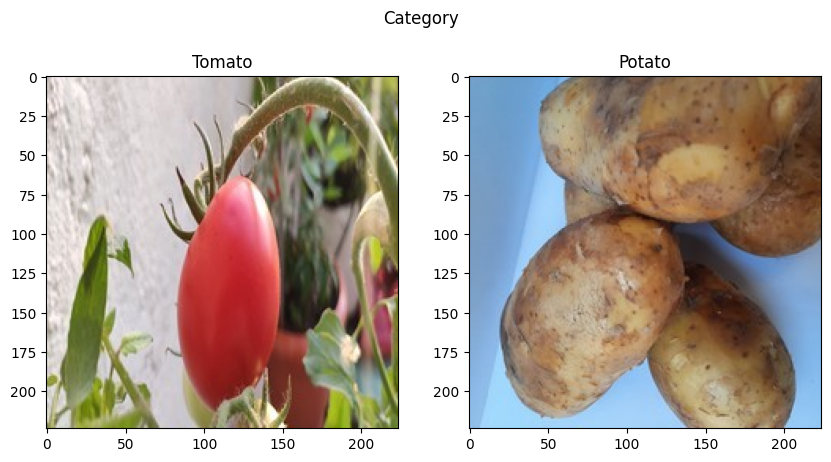

In [ ]:
fig, ax = plt.subplots(ncols= 2, nrows = 1, figsize=(10,5))
fig.suptitle('Category')

tomato_img = img.imread(Tomato[0])
potato_img = img.imread(Potato[0])

ax[0].set_title('Tomato')
ax[1].set_title('Potato')

ax[0].imshow(tomato_img)
ax[1].imshow(potato_img)

In [ ]:
df_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

df_labels = {
    'Tomato':0,
    'Potato':1
}

In [ ]:
img = Image.open(str(df_images['Tomato'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

(224, 224, 3)


In [ ]:
X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(df_labels[label])

In [ ]:
print('len(X) : ',len(X))
print('len(y) : ',len(y))


len(X) :  2010
len(y) :  2010


In [ ]:
X = np.array(X, dtype='float32') / 255.0  # Convert to float and normalize
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(2010, 224, 224, 3)
(2010,)


In [ ]:
y_cat = to_categorical(y)

In [ ]:
Tomato = list(validation_dir.glob('Tomato/*'))
Potato = list(validation_dir.glob('Potato/*'))

val_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

val_labels = {
    'Tomato':0,
    'Potato':1
}

X_val, y_val = [], []  # X = images, y = labels
for label, images in val_images.items():
    for image in images:
        img = Image.open(image)
        X_val.append(np.array(img))
        y_val.append(val_labels[label])

img = Image.open(str(val_images['Tomato'][0]))
img_array = np.array(img) # Convert the image to numerical array
img_shape = img_array.shape # Check the shape of the array
print(img_shape)

# Standardize
X_val = np.array(X_val, dtype='float32') / 255.0
y_val = np.array(y_val)

print(X_val.shape)
print(y_val.shape)

y_val = to_categorical(y_val)

print(X_val.shape)
print(y_val.shape)


(224, 224, 3)
(400, 224, 224, 3)
(400,)
(400, 224, 224, 3)
(400, 2)


In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(224,224,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(512,activation = 'relu'))
cnn.add(Dense(256,activation='relu'))
cnn.add(Dense(128,activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(2,activation='sigmoid'))

cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

In [ ]:
history = cnn.fit(X,y_cat,epochs=25,validation_data=(X_val,y_val))

Epoch 1/25
63/63 [==============================] - 756s 12s/step - loss: 0.7726 - accuracy: 0.5358 - val_loss: 0.6000 - val_accuracy: 0.6475
Epoch 2/25
44/63 [===================>..........] - ETA: 3:19 - loss: 0.5814 - accuracy: 0.6726

In [ ]:
Tomato = list(test_dir.glob('Tomato/*'))
Potato = list(test_dir.glob('Potato/*'))

test_images = {
    'Tomato':Tomato,
    'Potato':Potato
}

test_labels = {
    'Tomato':0,
    'Potato':1
}

X_test, y_test = [], []
for label, images in test_images.items():
    for image in images:
        img = Image.open(image)
        X_test.append(np.array(img))
        y_test.append(test_labels[label])

img = Image.open(str(test_images['Tomato'][0]))
img_array = np.array(img)
img_shape = img_array.shape
print(img_shape)

X_test = np.array(X_test, dtype='float32') / 255.0
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = to_categorical(y_test)

print(X_test.shape)
print(y_test.shape)

In [ ]:
img_path = '/content/tomato.jpg'
img = Image.open(img_path)

img = img.resize((224, 224))

plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_array = np.array(img)

print("Image Shape:", img_array.shape)

img_array = np.array(img) / 255.0

print("Image Shape (normalized):", img_array.shape)

predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

predicted_index = np.argmax(predictions)

In [ ]:
if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

In [ ]:
img_path = '/content/potato.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
img_array = np.array(img)
print("Image Shape:", img_array.shape)

In [ ]:
img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

In [ ]:
predictions = cnn.predict(np.expand_dims(img_array, axis=0))
print(predictions)

In [ ]:
predicted_index = np.argmax(predictions)

In [ ]:
if predicted_index == 0:
    predicted_class = 'Tomato'
elif predicted_index == 1:
    predicted_class = 'Potato'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)